In [1]:
# Importa as bibliotecas necessárias para manipular dados, criar gráficos e trabalhar com arrays numéricos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Carrega os dados do arquivo CSV para dentro de um DataFrame chamado df
# O arquivo 'medical_examination.csv' contém dados de exames médicos
df = pd.read_csv('medical_examination.csv')

In [3]:
# Cria uma nova coluna chamada 'overweight' no DataFrame df
# Essa coluna é calculada a partir do IMC (índice de massa corporal) usando a fórmula: peso / altura^2
# Se o IMC for maior que 25, o valor será 1 (indicando sobrepeso); caso contrário, será 0
df['overweight'] = (df['weight'] / ((df['height'] / 100) ** 2)).apply(lambda x: 1 if x > 25 else 0)


In [5]:
# Normaliza os dados nas colunas 'cholesterol' e 'gluc' (glicose)
# Se o valor for 1 (normal), ele será 0 (bom); se for maior que 1, será 1 (ruim)
df['cholesterol'] = df['cholesterol'].apply(lambda x: 1 if x > 1 else 0)
df['gluc'] = df['gluc'].apply(lambda x: 1 if x > 1 else 0)

In [7]:
# Função para desenhar o gráfico categórico (catplot)
def draw_cat_plot():
    # Usa o método pd.melt para reorganizar o DataFrame no formato 'long', colocando várias colunas em uma só
    # As colunas selecionadas são: cholesterol, gluc, smoke, alco, active, overweight
    # Essas colunas serão transformadas em variáveis categóricas, com seus valores associados
    df_cat = pd.melt(df, id_vars='cardio', value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

    # Adiciona uma coluna 'total' que conta quantas vezes cada combinação aparece no DataFrame
    df_cat['total'] = 1

    # Agrupa os dados por 'cardio', 'variable' (a variável categórica) e 'value' (o valor da variável)
    # Isso serve para contar quantas vezes cada combinação de variável e valor aparece
    df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index=False).count()

    # Cria o gráfico categórico usando o método catplot da biblioteca seaborn
    # O gráfico mostra as contagens de cada variável categórica, separadas pela coluna 'cardio' (presença ou não de doenças cardíacas)
    fig = sns.catplot(x='variable', y='total', hue='value', col='cardio', data=df_cat, kind='bar').fig

    # Salva o gráfico como um arquivo PNG e retorna a figura
    fig.savefig('catplot.png')
    return fig

In [8]:
# Função para desenhar o mapa de calor (heatmap)
def draw_heat_map():
    # Filtra os dados para remover valores incorretos ou extremos
    # Remove dados em que a pressão arterial diastólica ('ap_lo') é maior que a sistólica ('ap_hi')
    # Remove também dados em que a altura e o peso estão fora dos percentis 2.5 e 97.5, para manter apenas valores razoáveis
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
                 (df['height'] >= df['height'].quantile(0.025)) &
                 (df['height'] <= df['height'].quantile(0.975)) &
                 (df['weight'] >= df['weight'].quantile(0.025)) &
                 (df['weight'] <= df['weight'].quantile(0.975))]

    # Calcula a matriz de correlação entre todas as colunas numéricas do DataFrame filtrado
    # Isso mostra como as variáveis se relacionam umas com as outras
    corr = df_heat.corr()

    # Cria uma máscara para o triângulo superior da matriz de correlação, já que a correlação é simétrica
    # Isso evita que os mesmos valores apareçam duas vezes
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Configura o tamanho da figura (12x12) e desenha o mapa de calor (heatmap) usando a matriz de correlação
    # A máscara criada anteriormente é aplicada para esconder o triângulo superior
    # O cmap é 'coolwarm', que vai do azul (correlações negativas) ao vermelho (correlações positivas)
    fig, ax = plt.subplots(figsize=(12, 12))
    sns.heatmap(corr, mask=mask, annot=True, fmt='.1f', cmap='coolwarm', center=0, square=True, cbar_kws={'shrink': .5})

    # Salva o gráfico de calor como um arquivo PNG e retorna a figura
    fig.savefig('heatmap.png')
    return fig

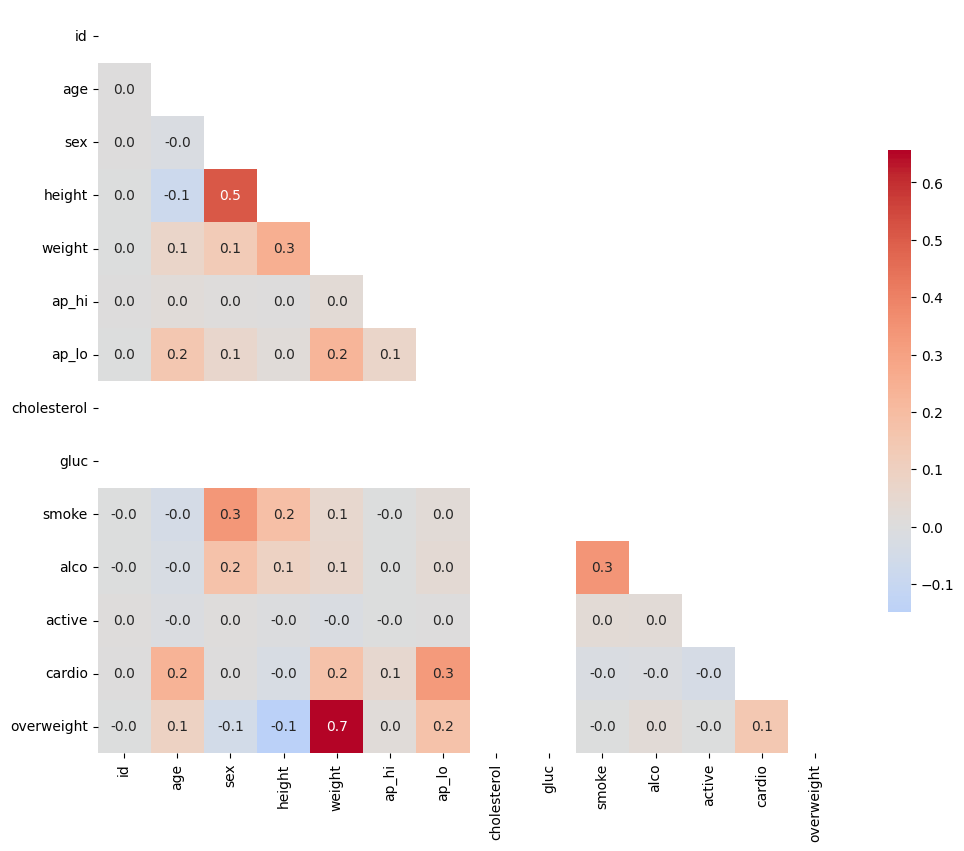

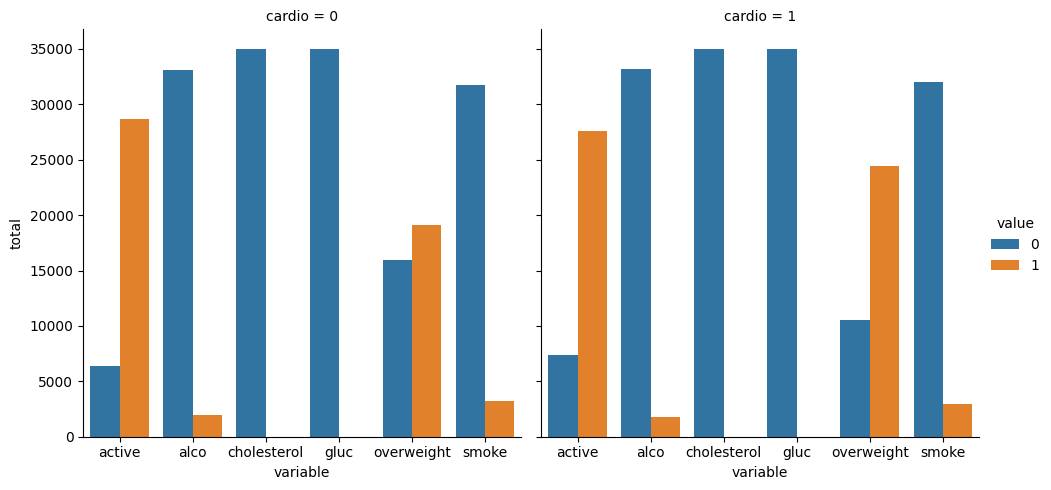

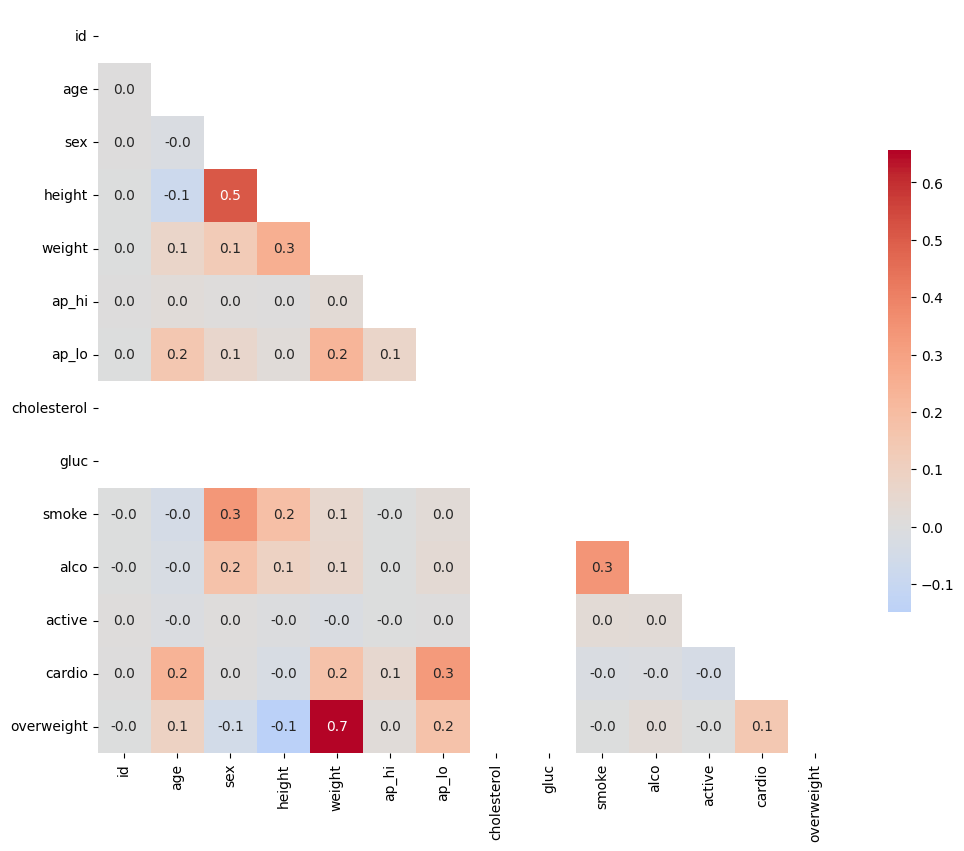

In [9]:
# Chamando as funções para gerar os gráficos
draw_cat_plot()
draw_heat_map()